In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data-irigasi-tetes.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'date', 'humidity', 'temperature', 'ambient humidity',
       'ambient temperature', 'light', 'status'],
      dtype='object')

In [7]:
df = df[['date', 'humidity', 'temperature', 'ambient humidity',
       'ambient temperature', 'light', 'status']]

In [8]:
df.describe()

,humidity,temperature,ambient humidity,ambient temperature,light
count,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000
mean,40.165062,45.986959,46.161296,33.574568,45025.001173
std,24.887582,3.997128,5.501626,0.803487,58.429120
min,20.000000,37.990000,35.000000,30.000000,44887.000000
25%,20.000000,45.010000,42.000000,33.000000,44982.000000
50%,40.000000,45.010000,46.000000,34.000000,45037.000000
75%,40.000000,50.010000,49.000000,34.000000,45070.000000
max,98.000000,50.010000,67.000000,34.000000,45124.000000


In [9]:
df['status'].unique()

array(['siram', 'mengering', 'jeda'], dtype=object)

In [10]:
df[(df['status']=="siram")].describe()

,humidity,temperature,ambient humidity,ambient temperature,light
count,1800.0,1800.000000,1800.000000,1800.000000,1800.000000
mean,98.0,37.990194,54.370556,33.811111,45031.479444
std,0.0,0.002608,6.302890,0.391529,13.155191
min,98.0,37.990000,40.000000,33.000000,44995.000000
25%,98.0,37.990000,50.000000,34.000000,45027.000000
50%,98.0,37.990000,55.000000,34.000000,45034.000000
75%,98.0,37.990000,59.000000,34.000000,45040.000000
max,98.0,38.030000,67.000000,34.000000,45059.000000


In [11]:
df[(df['status']=="mengering")].describe()

,humidity,temperature,ambient humidity,ambient temperature,light
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,44.783611,44.326636,45.418750,33.394028,45068.488056
std,12.581320,1.652511,5.361038,0.998620,25.742015
min,40.000000,37.990000,35.000000,30.000000,45024.000000
25%,40.000000,45.010000,41.000000,33.000000,45043.000000
50%,40.000000,45.010000,45.000000,34.000000,45070.000000
75%,40.000000,45.010000,49.000000,34.000000,45089.000000
max,98.000000,45.010000,56.000000,34.000000,45124.000000


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

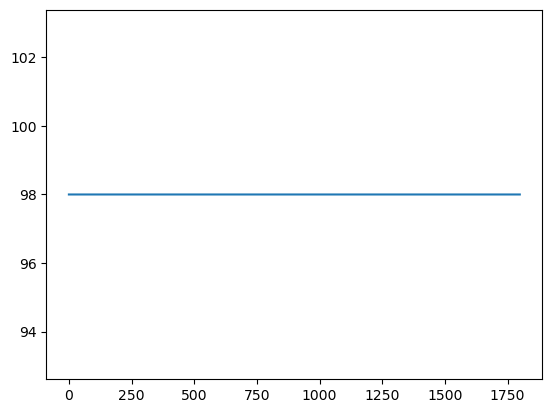

In [17]:
plt.figure()
df[(df['status']=="siram")]['humidity'].plot()

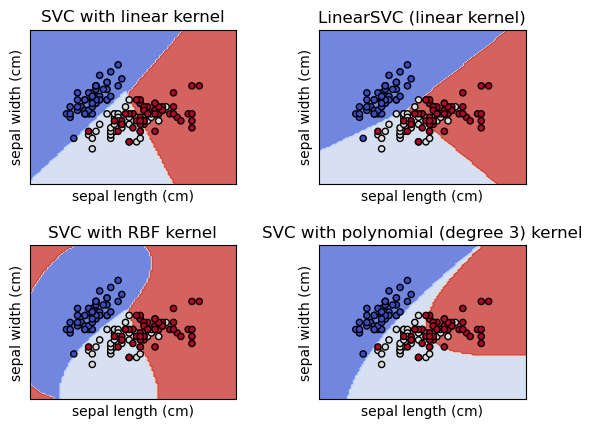

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

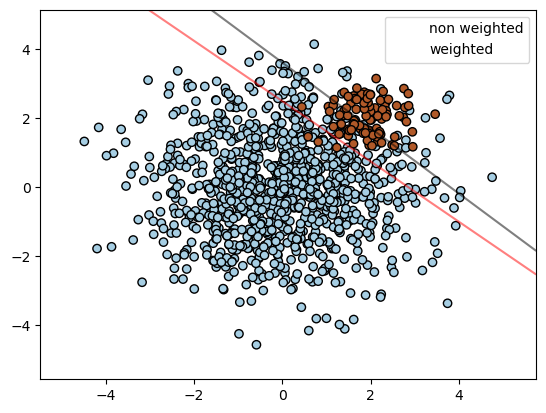

In [2]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

# plot decision boundary and margins for weighted classes
wdisp = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X,
    plot_method="contour",
    colors="r",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

plt.legend(
    [disp.surface_.collections[0], wdisp.surface_.collections[0]],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()

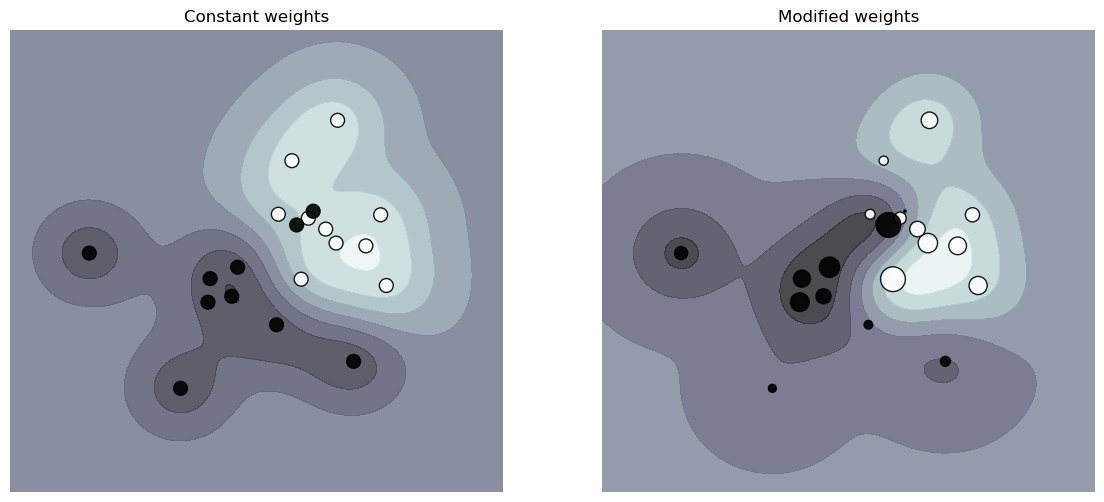

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm


def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)


# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# Fit the models.

# This model does not take into account sample weights.
clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

# This other model takes into account some dedicated sample weights.
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1], "Modified weights")

plt.show()